Teste de implementação de XGBoost, utilizando dados de vendas de lojas.
Os arquivos csv foram anexados na root do jupyter sagemaker.

In [1]:
# load datasets and data exploration

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile

In [3]:
features = pd.read_csv('Features_data_set.csv')
sales = pd.read_csv('sales_data_set.csv')
stores = pd.read_csv('stores_data_set.csv')

In [4]:
# data exploration

In [5]:
stores.head(5)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [6]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [7]:
avg_size_stores = stores['Size'].median()
avg_size_stores

126512.0

In [8]:
features.head(-5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8180,45,24/05/2013,67.11,3.627,3249.34,481.82,58.48,1183.23,1309.30,NaN,NaN,False
8181,45,31/05/2013,65.88,3.646,6474.49,411.38,77.06,9.38,4227.27,NaN,NaN,False
8182,45,07/06/2013,70.71,3.633,9977.82,744.29,80.00,4825.71,3597.34,NaN,NaN,False
8183,45,14/06/2013,70.01,3.632,2471.44,517.87,348.54,2612.33,3459.39,NaN,NaN,False


In [9]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [10]:
max_fuel_price = features[features['Fuel_Price'] == features['Fuel_Price'].max()]
max_fuel_price

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
1778,10,12/10/2012,76.03,4.468,2674.51,NaN,10.32,1390.15,8116.13,131.108333,6.943,False
2142,12,12/10/2012,71.74,4.468,1986.92,NaN,16.75,910.50,4225.20,131.108333,10.199,False
5054,28,12/10/2012,71.74,4.468,1546.44,NaN,13.36,1057.73,6560.97,131.108333,10.199,False
5964,33,12/10/2012,79.64,4.468,33.23,NaN,NaN,NaN,590.43,131.108333,6.895,False
6874,38,12/10/2012,71.74,4.468,202.43,NaN,8.66,0.22,700.92,131.108333,10.199,False
7602,42,12/10/2012,76.03,4.468,49.38,NaN,10.87,NaN,970.72,131.108333,6.943,False


In [11]:
sales.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
5,1,1,12/03/2010,21043.39,False
6,1,1,19/03/2010,22136.64,False
7,1,1,26/03/2010,26229.21,False
8,1,1,02/04/2010,57258.43,False
9,1,1,09/04/2010,42960.91,False


In [12]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [13]:
# Transform Date str in Date
features['Date'] = pd.to_datetime(features['Date'])
sales['Date'] = pd.to_datetime(sales['Date'])

In [14]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB


In [15]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-05-02,24924.50,False
1,1,1,2010-12-02,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-05-03,21827.90,False


In [16]:
# merge the 3 datasets in 1 dataframe
df = pd.merge(sales, features, on = ['Store', 'Date', 'IsHoliday'])

In [17]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-05-02,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-05-02,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-05-02,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-05-02,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-05-02,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [18]:
df = pd.merge(df, stores, on = ['Store'], how = 'left')

In [19]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-05-02,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-05-02,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-05-02,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-05-02,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-05-02,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [20]:
#month = str(df['Date']).split('-')
#df['month'] = month[1].to_frame()
#month

In [21]:
# extract month of the column 'Date'
def month(x):
    return int(str(x).split('-')[1])

In [22]:
df['month'] = df['Date'].apply(month)

In [23]:
df.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,month
0,1,1,2010-05-02,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5
1,1,2,2010-05-02,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5
2,1,3,2010-05-02,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5
3,1,4,2010-05-02,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5
4,1,5,2010-05-02,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5


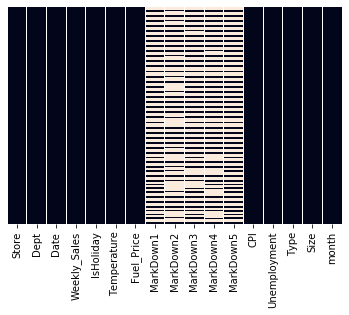

In [24]:
# explore dataframe merged
sns.heatmap(df.isnull(), cbar = False, yticklabels= False)

In [25]:
df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
month                0
dtype: int64

In [26]:
# fill na data
df.fillna(value=0 , inplace = True)

In [27]:
# statistical summary for dataframe
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,month
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,136727.915739,6.478580
std,12.785297,30.492054,22711.183519,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,60980.583328,3.324757
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000,1.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000,4.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,140167.000000,6.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,202505.000000,9.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000,12.000000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     421570 non-null  float64       
 8   MarkDown2     421570 non-null  float64       
 9   MarkDown3     421570 non-null  float64       
 10  MarkDown4     421570 non-null  float64       
 11  MarkDown5     421570 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  object        
 15  Size          421

In [29]:
# check duplicated
df.duplicated().sum()

0

In [30]:
# count stores for type
df['Type'].value_counts()

A    215478
B    163495
C     42597
Name: Type, dtype: int64

In [31]:
# replace False/True of 'IsHoliday'
df['IsHoliday'] = df['IsHoliday'].replace({False:0, True:1})

In [32]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,month
0,1,1,2010-05-02,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,5
1,1,2,2010-05-02,50605.27,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,5
2,1,3,2010-05-02,13740.12,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,5
3,1,4,2010-05-02,39954.04,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,5
4,1,5,2010-05-02,32229.38,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,5


In [33]:
# create pivot table to understanding relationship in data
result = df.pivot_table( values = 'Weekly_Sales', index= ['Date','Store','Dept'], columns= 'Type', aggfunc=np.mean)

In [34]:
result

Type                          A         B   C
Date       Store Dept                        
2010-01-10 1     1     20094.19       NaN NaN
                 2     45829.02       NaN NaN
                 3      9775.17       NaN NaN
                 4     34912.45       NaN NaN
                 5     23381.38       NaN NaN
...                         ...       ...  ..
2012-12-10 45    93         NaN   2644.24 NaN
                 94         NaN   4041.28 NaN
                 95         NaN  49334.77 NaN
                 97         NaN   6463.32 NaN
                 98         NaN   1061.02 NaN

[421570 rows x 3 columns]

In [35]:
result.describe()

Type,A,B,C
count,215478.000000,163495.000000,42597.000000
mean,20099.568043,12237.075977,9519.532538
std,26423.457227,17203.668989,15985.351612
min,-4988.940000,-3924.000000,-379.000000
25%,3315.090000,1927.055000,131.990000
50%,10105.170000,6187.870000,1149.670000
75%,26357.180000,15353.740000,12695.010000
max,474330.100000,693099.360000,112152.350000


In [36]:
# pivot table to discovery relationship between Mardowns and holidays
result_md = df.pivot_table(values = ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], index = ['Date', 'Store', 'Dept'], columns = ['IsHoliday'], aggfunc={'MarkDown1':np.mean, 'MarkDown2': np.mean,
                                                                                                                       'MarkDown3': np.mean, 'MarkDown4': np.mean,
                                                                                                                       'MarkDown5': np.mean})

In [37]:
result_md

MarkDown1     MarkDown2     MarkDown3     MarkDown4      \
IsHoliday                     0   1         0   1         0   1         0   1   
Date       Store Dept                                                           
2010-01-10 1     1         0.00 NaN       0.0 NaN      0.00 NaN      0.00 NaN   
                 2         0.00 NaN       0.0 NaN      0.00 NaN      0.00 NaN   
                 3         0.00 NaN       0.0 NaN      0.00 NaN      0.00 NaN   
                 4         0.00 NaN       0.0 NaN      0.00 NaN      0.00 NaN   
                 5         0.00 NaN       0.0 NaN      0.00 NaN      0.00 NaN   
...                         ...  ..       ...  ..       ...  ..       ...  ..   
2012-12-10 45    93     1956.28 NaN       0.0 NaN      7.89 NaN    599.32 NaN   
                 94     1956.28 NaN       0.0 NaN      7.89 NaN    599.32 NaN   
                 95     1956.28 NaN       0.0 NaN      7.89 NaN    599.32 NaN   
                 97     1956.28 NaN       0.0 NaN      7.89 NaN    599.32 NaN   
                 98     1956.28 NaN       0.0 NaN      7.89 NaN    599.32 NaN   

                      MarkDown5      
IsHoliday                     0   1  
Date       Store Dept                
2010-01-10 1     1         0.00 NaN  
                 2         0.00 NaN  
                 3         0.00 NaN  
                 4         0.00 NaN  
                 5         0.00 NaN  
...                         ...  ..  
2012-12-10 45    93     3990.54 NaN  
                 94     3990.54 NaN  
                 95     3990.54 NaN  
                 97     3990.54 NaN  
                 98     3990.54 NaN  

[421570 rows x 10 columns]

In [38]:
result_md.describe()

MarkDown1                    MarkDown2                 \
IsHoliday              0             1              0              1   
count      391909.000000  29661.000000  391909.000000   29661.000000   
mean         2595.936803   2512.620778     589.580546    4716.929394   
std          6123.402037   5020.047408    2984.163111   15295.329993   
min             0.000000      0.000000    -265.760000      -9.980000   
25%             0.000000      0.000000       0.000000       0.000000   
50%             0.000000      0.000000       0.000000       0.000000   
75%          2826.570000   2463.160000       0.500000      65.000000   
max         88646.760000  36778.650000   45971.430000  104519.540000   

               MarkDown3                     MarkDown4                \
IsHoliday              0              1              0             1   
count      391909.000000   29661.000000  391909.000000  29661.000000   
mean           62.778142    5823.417900    1070.741151   1246.855336   
std           630.704594   19959.302249    3921.553070   3513.998030   
min           -29.100000       0.000000       0.000000      0.000000   
25%             0.000000       0.000000       0.000000      0.000000   
50%             0.000000       0.000000       0.000000      0.000000   
75%             3.840000      66.080000     442.390000    319.190000   
max         25959.980000  141630.610000   67474.850000  29483.810000   

               MarkDown5                
IsHoliday              0             1  
count      391909.000000  29661.000000  
mean         1680.408001   1429.754053  
std          4312.031598   2427.638027  
min             0.000000      0.000000  
25%             0.000000      0.000000  
50%             0.000000      0.000000  
75%          2182.320000   2069.300000  
max        108519.280000  11100.550000

In [39]:
# corelation matrix about features
corr_matrix = df.drop( columns= ['Store']).corr()

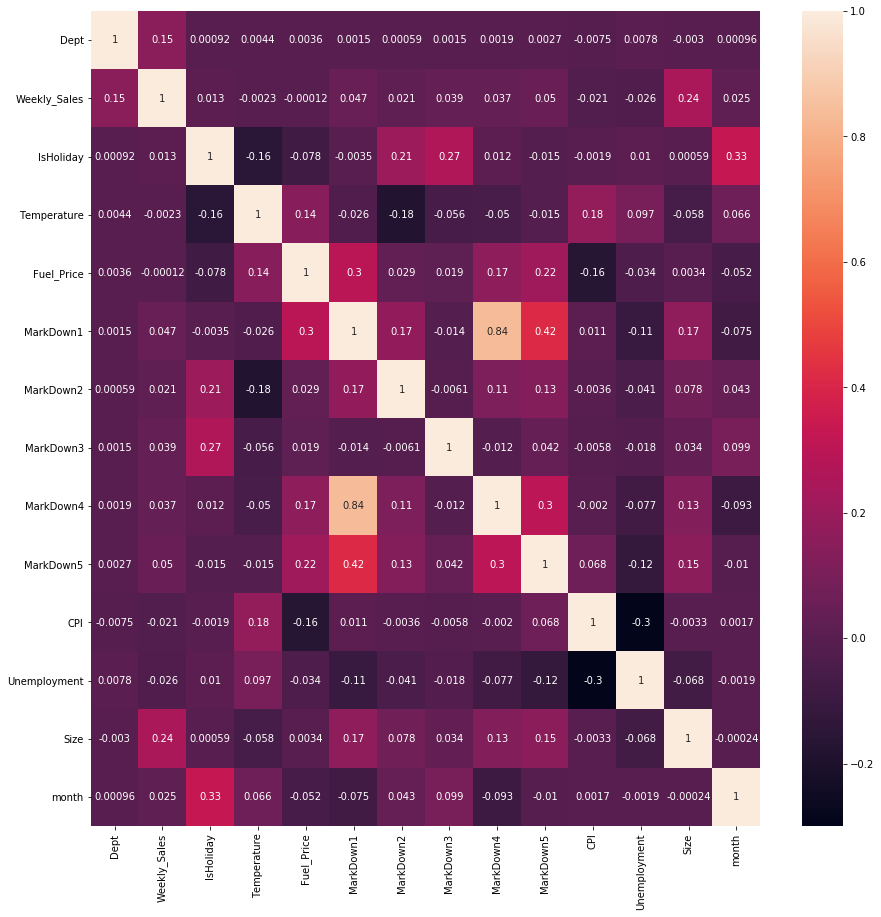

In [40]:
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, annot= True)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f705567bcf8>,
      dtype=object)

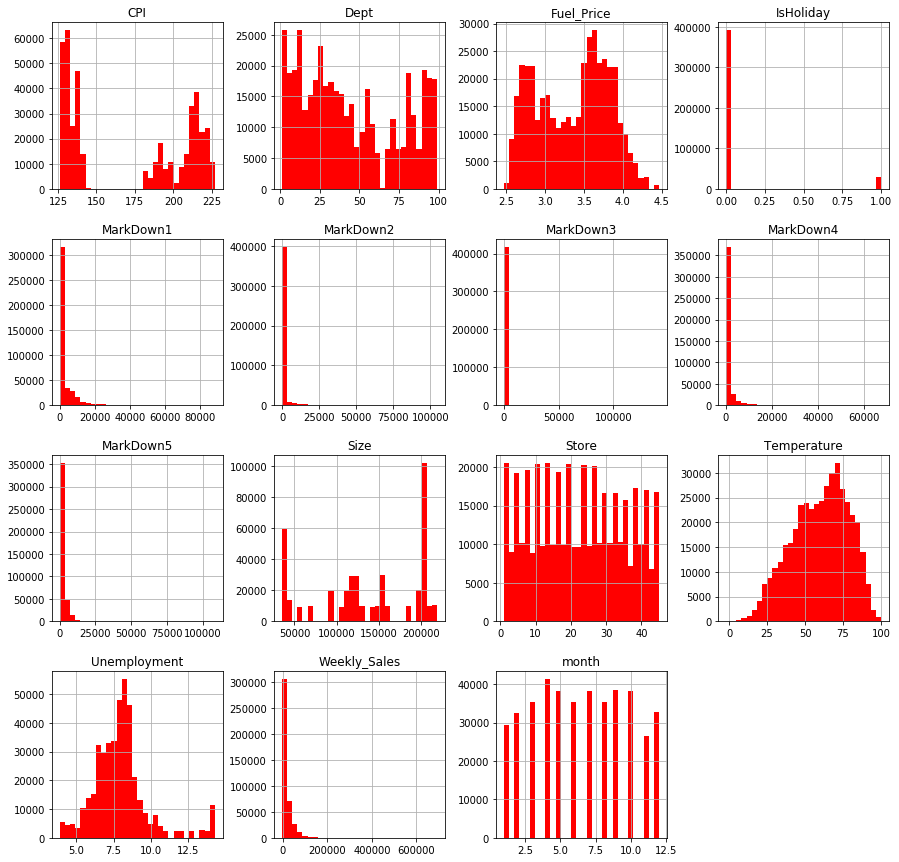

In [41]:
# histogram of data
df.hist(bins=30, color='r', figsize=(15,15))

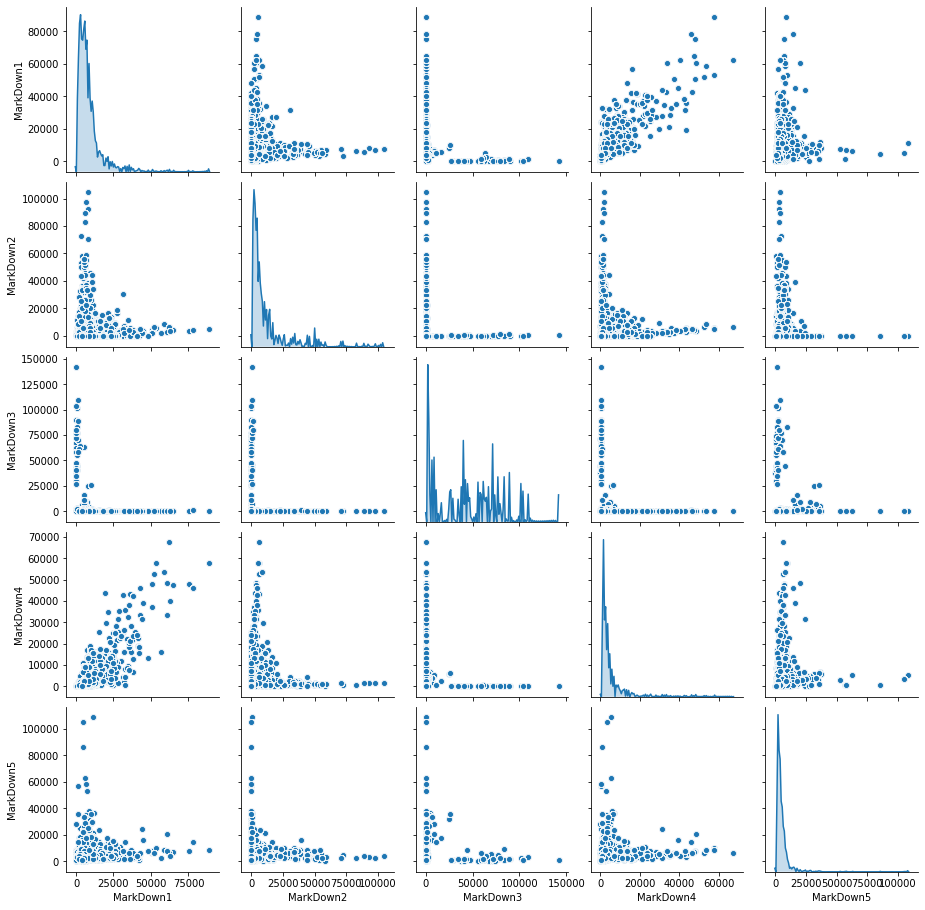

In [42]:
# visualizing the relationship using pairplots
# there is a relationship between markdown #1 and Markdown #4
# holiday and sales 
# Weekly sales and markdown #3
sns.pairplot(df[["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"]], diag_kind='kde')

In [43]:
df_type = df.groupby('Type').mean()

In [44]:
df_type

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,month
Type,,,,,,,,,,,,,,,
A,21.736419,44.622156,20099.568043,0.070471,60.531945,3.343999,3102.403194,1083.216159,549.644930,1325.891281,2147.830168,174.408895,7.791595,182231.285486,6.480030
B,18.450417,43.112273,12237.075977,0.070412,57.562951,3.382523,2553.465968,827.500452,481.215226,1043.927675,1324.921913,167.176656,7.928836,101818.735827,6.478100
C,38.942015,46.836350,9519.532538,0.069582,67.554266,3.364654,138.960203,53.274338,5.142226,5.603993,505.826631,170.429314,8.934350,40535.725286,6.473085


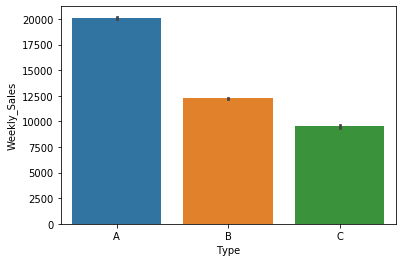

In [45]:
sns.barplot(data = df, y = df['Weekly_Sales'], x = df['Type'])

In [46]:
# groupby departament
df_dept = df.groupby('Dept').mean()
df_dept

,Store,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,month
Dept,,,,,,,,,,,,,,
1,23.000000,19213.485088,0.069930,60.663782,3.358607,2429.019322,818.872810,429.184037,1008.870435,1581.806813,171.578394,7.999151,130287.600000,6.475524
2,23.000000,43607.020113,0.069930,60.663782,3.358607,2429.019322,818.872810,429.184037,1008.870435,1581.806813,171.578394,7.999151,130287.600000,6.475524
3,23.000000,11793.698516,0.069930,60.663782,3.358607,2429.019322,818.872810,429.184037,1008.870435,1581.806813,171.578394,7.999151,130287.600000,6.475524
4,23.000000,25974.630238,0.069930,60.663782,3.358607,2429.019322,818.872810,429.184037,1008.870435,1581.806813,171.578394,7.999151,130287.600000,6.475524
5,22.757366,21365.583515,0.069797,60.559367,3.365397,2462.697233,830.226332,435.134596,1022.858240,1603.738276,171.109374,7.978057,131530.357964,6.479439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,23.000000,69824.423080,0.069930,60.663782,3.358607,2429.019322,818.872810,429.184037,1008.870435,1581.806813,171.578394,7.999151,130287.600000,6.475524
96,23.258138,15210.942761,0.069839,61.539285,3.359920,2362.845647,820.762363,397.214137,999.452087,1660.599345,171.562686,7.849295,129282.010507,6.482489
97,23.357439,14255.576919,0.069767,60.490781,3.362418,2463.638764,833.096524,432.439341,1025.957821,1591.276367,170.445933,8.043564,130676.377190,6.477700


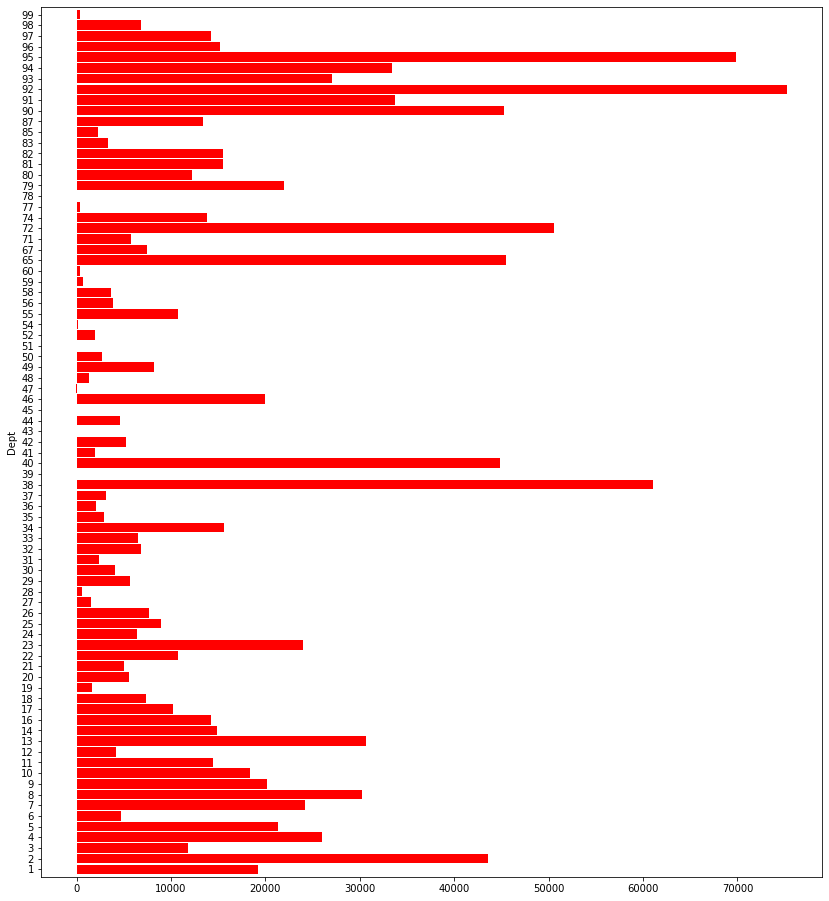

In [47]:
# see relationship between slaes and markdowns for departament
fig = plt.figure(figsize = (14,16))
df_dept['Weekly_Sales'].plot(kind = 'barh', color= 'r', width= 0.9)

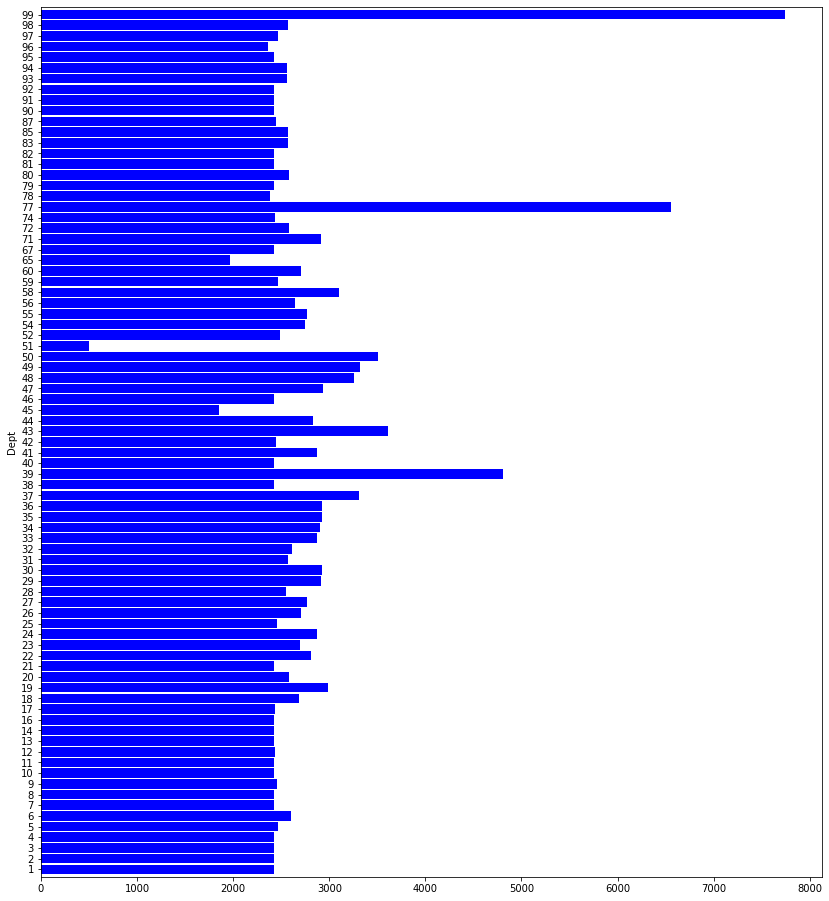

In [48]:
fig = plt.figure(figsize = (14,16))
df_dept['MarkDown1'].plot(kind = 'barh', color= 'b', width= 0.9)

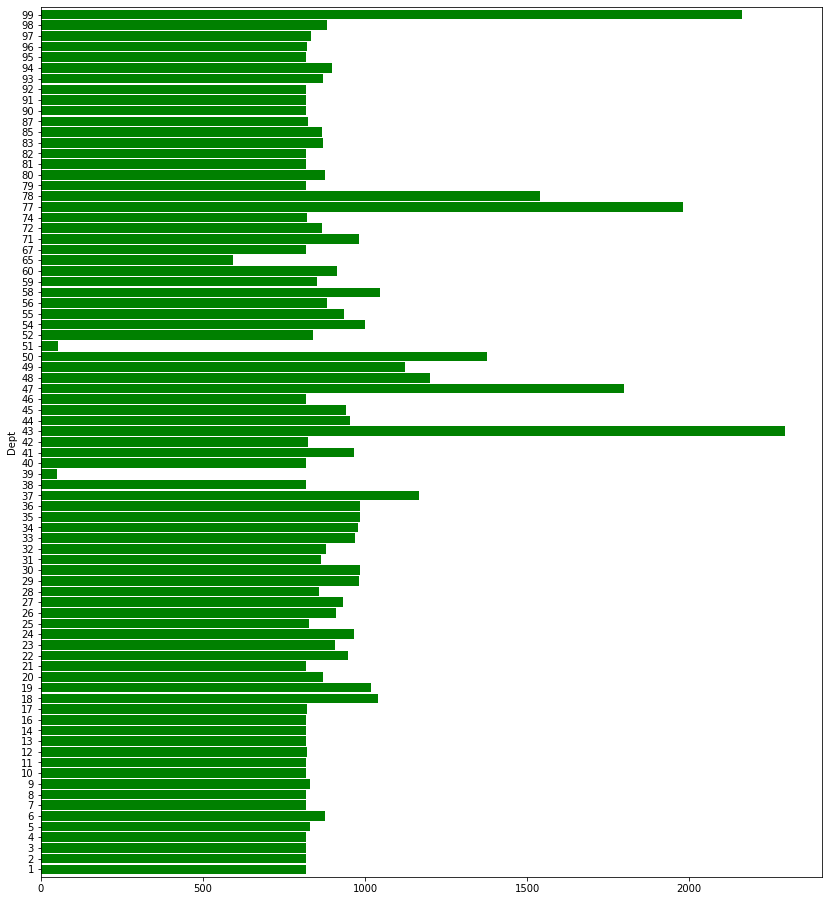

In [49]:
fig = plt.figure(figsize=(14,16))
df_dept['MarkDown2'].plot(kind='barh', color= 'g', width=0.9)

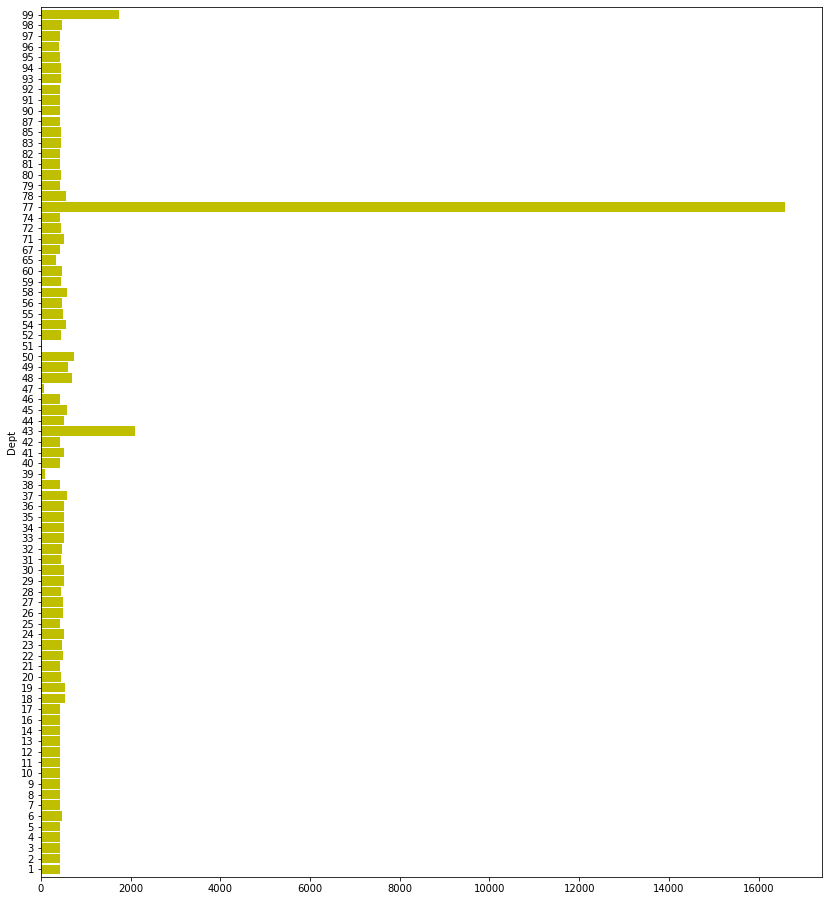

In [50]:
fig = plt.figure(figsize=(14,16))
df_dept['MarkDown3'].plot(kind='barh', color= 'y', width=0.9)

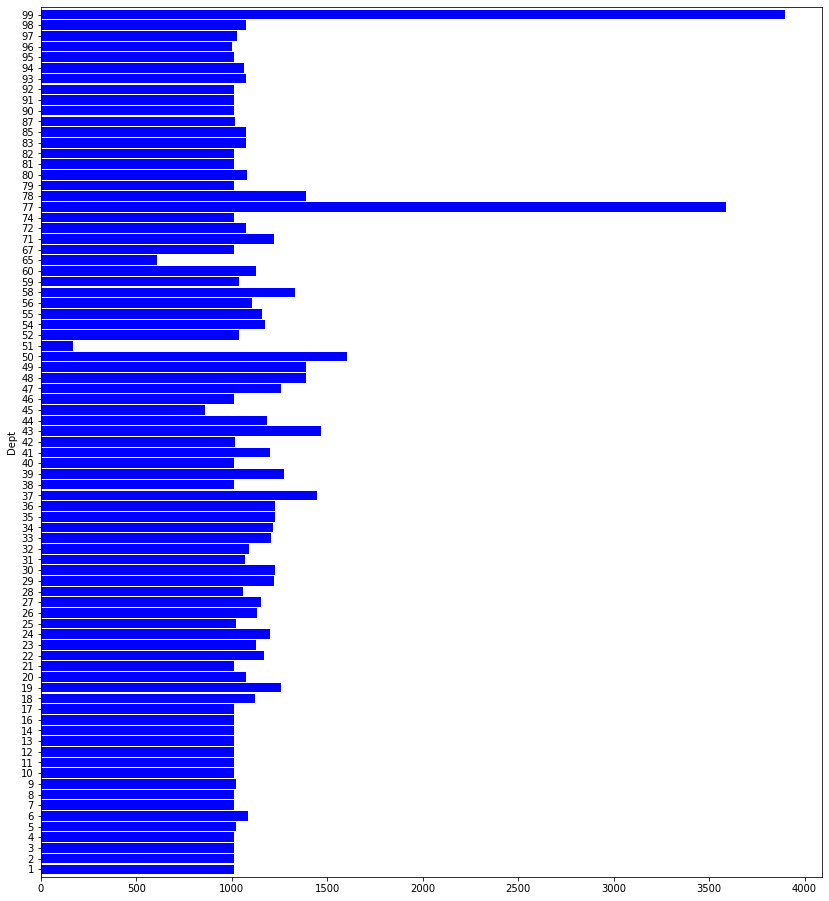

In [51]:
fig = plt.figure(figsize=(14,16))
df_dept['MarkDown4'].plot(kind='barh', color= 'b', width=0.9)

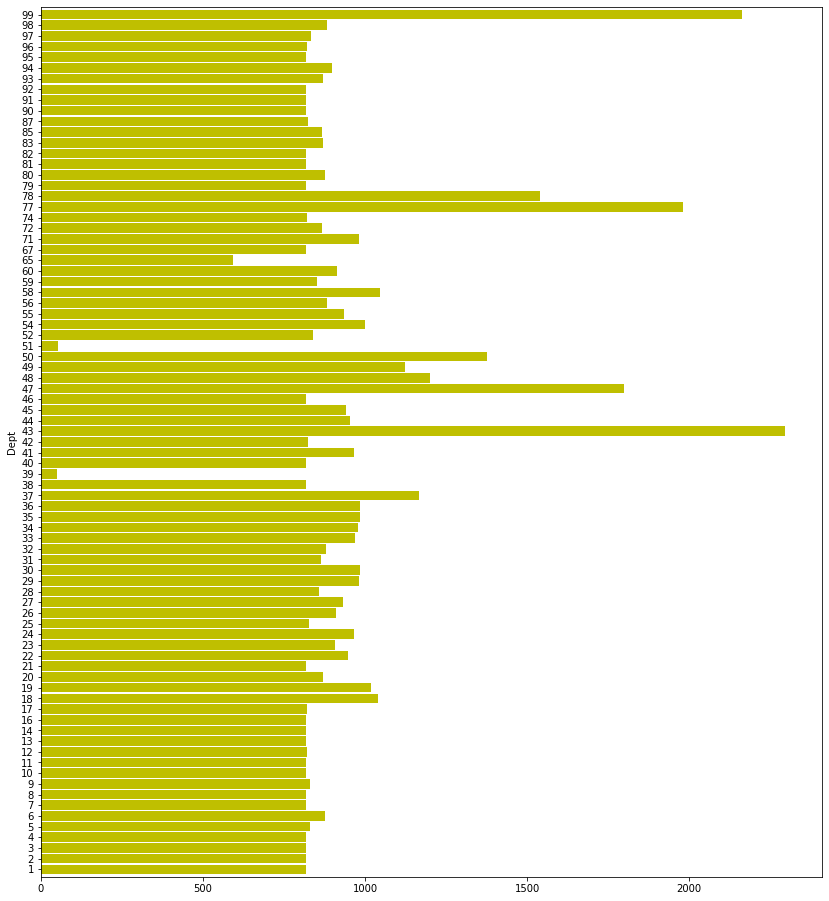

In [52]:
fig = plt.figure(figsize=(14,16))
df_dept['MarkDown2'].plot(kind='barh', color= 'y', width=0.9)

We can conclude that departments that have poor weekly sales have been assigned high number of markdowns. Let's explore this in more details

In [53]:
# prepare the data before training

In [54]:
df_target = df['Weekly_Sales']
df_final = df.drop(columns = ['Weekly_Sales', 'Date'])

In [55]:
df_final = pd.get_dummies(df_final, columns= ['Store', 'Dept', 'Type'], drop_first= True)

In [57]:
df_final.shape

(421570, 138)

In [58]:
df_target.shape

(421570,)

In [59]:
# transform to np.array

In [60]:
X = np.array(df_final).astype('float32')
y = np.array(df_target).astype('float32')

In [61]:
# reshape y
y = y.reshape(-1,1)
y.shape

(421570, 1)

In [62]:
# split data in to test and train

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

In [65]:
X_train

array([[ 0.   , 30.26 ,  3.874, ...,  0.   ,  1.   ,  0.   ],
       [ 0.   , 40.94 ,  3.631, ...,  0.   ,  1.   ,  0.   ],
       [ 0.   , 68.72 ,  4.088, ...,  0.   ,  0.   ,  0.   ],
       ...,
       [ 0.   , 54.54 ,  4.25 , ...,  0.   ,  1.   ,  0.   ],
       [ 0.   , 29.88 ,  3.751, ...,  0.   ,  0.   ,  0.   ],
       [ 0.   , 50.53 ,  3.489, ...,  0.   ,  1.   ,  0.   ]],
      dtype=float32)

In [66]:
y_train

array([[10891.62],
       [ 2904.62],
       [29816.47],
       ...,
       [45314.9 ],
       [  274.8 ],
       [47968.61]], dtype=float32)

In [67]:
# for use XGBoost in Sagemaker, the firts columns needs to be the Target

In [71]:
train_data = pd.DataFrame({'Target': y_train[:,0]})
for i in range(X_train.shape[1]):
    train_data[i]=X_train[:,i]

In [73]:
train_data.head()

,Target,0,1,2,3,4,5,6,7,8,...,128,129,130,131,132,133,134,135,136,137
0,10891.620117,0.0,30.260000,3.874,17822.560547,7914.950195,1.76,11094.940430,4922.189941,137.258316,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2904.620117,0.0,40.939999,3.631,0.000000,0.000000,0.00,0.000000,0.000000,207.428391,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,29816.470703,0.0,68.720001,4.088,17121.400391,17.820000,18.50,2384.179932,4270.339844,142.593887,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,46020.531250,0.0,87.010002,3.159,0.000000,0.000000,0.00,0.000000,0.000000,126.064003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3759.959961,0.0,74.040001,3.748,0.000000,0.000000,0.00,0.000000,0.000000,185.911987,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [77]:
val_data = pd.DataFrame({'Target':y_val[:,0]})
for i in range(X_val.shape[1]):
    val_data[i]=X_val[:,i]

In [78]:
val_data.head()

,Target,0,1,2,3,4,5,6,7,8,...,128,129,130,131,132,133,134,135,136,137
0,9392.519531,0.0,71.930000,3.620,10737.660156,423.399994,5.060000,1904.520020,3823.070068,191.029968,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,33123.601562,0.0,47.639999,4.004,2332.340088,2.820000,41.389999,28.040001,3318.169922,214.422302,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7006.470215,0.0,64.870003,3.858,0.000000,0.000000,0.000000,0.000000,0.000000,136.419495,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,12017.589844,0.0,56.820000,2.849,0.000000,0.000000,0.000000,0.000000,0.000000,131.940811,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,22.000000,0.0,21.330000,2.788,0.000000,0.000000,0.000000,0.000000,0.000000,131.527908,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [79]:
# save files in csv
train_data.to_csv('train_data.csv', header=False, index=False)
val_data.to_csv('val_data.csv', header=False, index=False)

In [80]:
# import libs aws

In [81]:
import sagemaker
import boto3

In [82]:
sagemaker_session = sagemaker.Session()

bucket = 'pedroagronanalytics'
key = 'XGBoost-test'
prefix = 'XGBoost-test'
role = sagemaker.get_execution_role()

In [83]:
print(role)

arn:aws:iam::878439880672:role/service-role/AmazonSageMaker-ExecutionRole-20181121T082196


In [84]:
# read csv file and upload in s3 bucket
import os
with open('train_data.csv', 'rb') as f:
    boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix,'train_data', key)).upload_fileobj(f)

s3_train_data = 's3://{}/{}/train_data/{}'.format(bucket, prefix, key)
print('uploaded train data file in s3: {}'.format(s3_train_data))

uploaded train data file in s3: s3://pedroagronanalytics/XGBoost-test/train_data/XGBoost-test


In [85]:
# read csv file validation and upload in s3
with open('val_data.csv', 'rb') as g:
    boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'val_data', key)).upload_fileobj(g)

s3_val_data = 's3://{}/{}/val_data/{}'.format(bucket, prefix, key)
print('uploaded val data in s3: {}'.format(s3_val_data))   

uploaded val data in s3: s3://pedroagronanalytics/XGBoost-test/val_data/XGBoost-test


In [86]:
# create folder where artefacts will be uploaded
output_location = 's3://{}/{}/output'.format(bucket, prefix)
print('training artefacts will be uploaded to: {}'.format(output_location))

training artefacts will be uploaded to: s3://pedroagronanalytics/XGBoost-test/output


In [89]:
# create container to algorithm

from sagemaker.amazon.amazon_estimator import get_image_uri

container = get_image_uri(boto3.Session().region_name, 'xgboost', '1.0-1')

'get_image_uri' method will be deprecated in favor of 'ImageURIProvider' class in SageMaker Python SDK v2.


In [90]:
# set hyperparameters
Xgboost_regressor1 = sagemaker.estimator.Estimator(container,
                                       role, 
                                       train_instance_count = 1, 
                                       train_instance_type = 'ml.m5.2xlarge',
                                       output_path = output_location,
                                       sagemaker_session = sagemaker_session)

Xgboost_regressor1.set_hyperparameters(max_depth = 10,
                           objective = 'reg:linear',
                           colsample_bytree = 0.3,
                           alpha = 10,
                           eta = 0.1,
                           num_round = 100
                           )

Parameter image_name will be renamed to image_uri in SageMaker Python SDK v2.


In [91]:
# Creating "train", "validation" channels to feed in the model

train_input = sagemaker.session.s3_input(s3_data = s3_train_data, content_type='csv',s3_data_type = 'S3Prefix')
valid_input = sagemaker.session.s3_input(s3_data = s3_val_data, content_type='csv',s3_data_type = 'S3Prefix')


data_channels = {'train': train_input,'validation': valid_input}


Xgboost_regressor1.fit(data_channels)

's3_input' class will be renamed to 'TrainingInput' in SageMaker Python SDK v2.
's3_input' class will be renamed to 'TrainingInput' in SageMaker Python SDK v2.


2020-10-29 17:22:38 Starting - Starting the training job...
2020-10-29 17:22:39 Starting - Launching requested ML instances.........
2020-10-29 17:24:12 Starting - Preparing the instances for training...
2020-10-29 17:24:47 Downloading - Downloading input data......
2020-10-29 17:25:58 Training - Training image download completed. Training in progress....
2020-10-29 17:26:33 Uploading - Uploading generated training modelINFO:sagemaker-containers:Imported framework sagemaker_xgboost_container.training
INFO:sagemaker-containers:Failed to parse hyperparameter objective value reg:linear to Json.
Returning the value itself
INFO:sagemaker-containers:No GPUs detected (normal if no gpus installed)
INFO:sagemaker_xgboost_container.training:Running XGBoost Sagemaker in algorithm mode
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
[17:26:02] 358334x138 matrix with 49450092 entries loaded from

In [92]:
# deploy model

xgboost_regressor = Xgboost_regressor1.deploy(initial_instance_count = 1, instance_type = 'ml.m5.2xlarge')

Parameter image will be renamed to image_uri in SageMaker Python SDK v2.


-------------!

In [94]:
from sagemaker.predictor import csv_serializer, json_deserializer

xgboost_regressor.content_type = 'text/csv'
xgboost_regressor.serializer = csv_serializer
xgboost_regressor.deserializer = None

In [96]:
X_test.shape

(31618, 138)

In [97]:
# Make predictions

In [98]:
predictions1 = xgboost_regressor.predict(X_test[0:10000])

In [99]:
predictions2 = xgboost_regressor.predict(X_test[10000:20000])

In [100]:
predictions3 = xgboost_regressor.predict(X_test[20000:30000])

In [101]:
predictions4 = xgboost_regressor.predict(X_test[30000:31618])

In [102]:
predictions4

b'27272.119140625,6525.4091796875,11439.720703125,8014.3076171875,39047.83984375,10884.087890625,3438.43408203125,17217.916015625,4817.7724609375,11054.3369140625,25617.642578125,55737.4296875,10433.822265625,3990.5244140625,6559.9072265625,11554.06640625,5756.95751953125,-498.4553527832031,3224.84326171875,4213.24365234375,15229.7626953125,27703.169921875,36257.14453125,6270.8837890625,13173.7041015625,93211.5390625,25997.490234375,4284.87109375,11190.580078125,45166.45703125,15556.0029296875,4578.61376953125,30609.240234375,4205.76025390625,15108.96875,22688.041015625,10654.6904296875,4154.85009765625,5596.802734375,8422.3896484375,8750.1630859375,50142.6484375,-1106.1883544921875,6959.466796875,3664.73583984375,6933.658203125,3471.89892578125,10331.46484375,15522.2509765625,6933.658203125,15184.7216796875,30351.634765625,7020.92724609375,10183.0029296875,6242.166015625,3324.125,7924.2890625,7649.01123046875,22770.90625,19494.115234375,3520.6865234375,4518.68212890625,2428.8259277343

In [103]:
# clean the results

def clean(x):
    
    g = str(x).split(',')
    g[0] = g[0][2:]
    g[-1] = g[-1][:-1]
    
    for i in range(len(g)):
        g[i] = float(g[i])
    
    
    g = np.array(g).astype('float32')
    
    return g.reshape(-1,1)

In [104]:
predict_values1 = clean(predictions1)

In [105]:
predict_values1.shape

(10000, 1)

In [106]:
predict_values2 = clean(predictions2)

In [107]:
predici_values3 = clean(predictions3)

In [108]:
predict_values4 = clean(predictions4)

In [110]:
predicted_values = np.concatenate((predict_values1, predict_values2, predici_values3, predict_values4))

In [111]:
predicted_values.shape

(31618, 1)

In [112]:
# metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, predicted_values)),'.3f'))
MSE = mean_squared_error(y_test, predicted_values)
MAE = mean_absolute_error(y_test, predicted_values)
r2 = r2_score(y_test, predicted_values)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 7415.102 
MSE = 54983730.0 
MAE = 4422.806 
R2 = 0.8921025664981882 
Adjusted R2 = 0.8916295576407515


In [114]:
# Delete the end-point

xgboost_regressor.delete_endpoint()